In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.io as sio
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import cm
import numpy as np
from numpy import ma
from scipy.linalg import eig
from datetime import datetime
import pytz
from matplotlib import colors
import matplotlib
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
from Asymptotic import select_asymptotic
import xarray as xr
from Turbulence_processing.Scaling.Anisotropy import Anisotropy

# Stable conditions

In [3]:
ds_1c = xr.open_dataset('Metcrax_stable_1c.nc')
ds_2c = xr.open_dataset('Metcrax_stable_2c.nc')
ds_3c = xr.open_dataset('Metcrax_stable_3c.nc')

In [5]:
ds_1c = ds_1c.stack(index=('time','heights')).reset_index('index').dropna(dim='index')

C:\Users\samue\anaconda3\envs\TurbProc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samue\anaconda3\envs\TurbProc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samue\anaconda3\envs\TurbProc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samue\anaconda3\envs\TurbProc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='Pdf', ylabel='$\\phi$'>

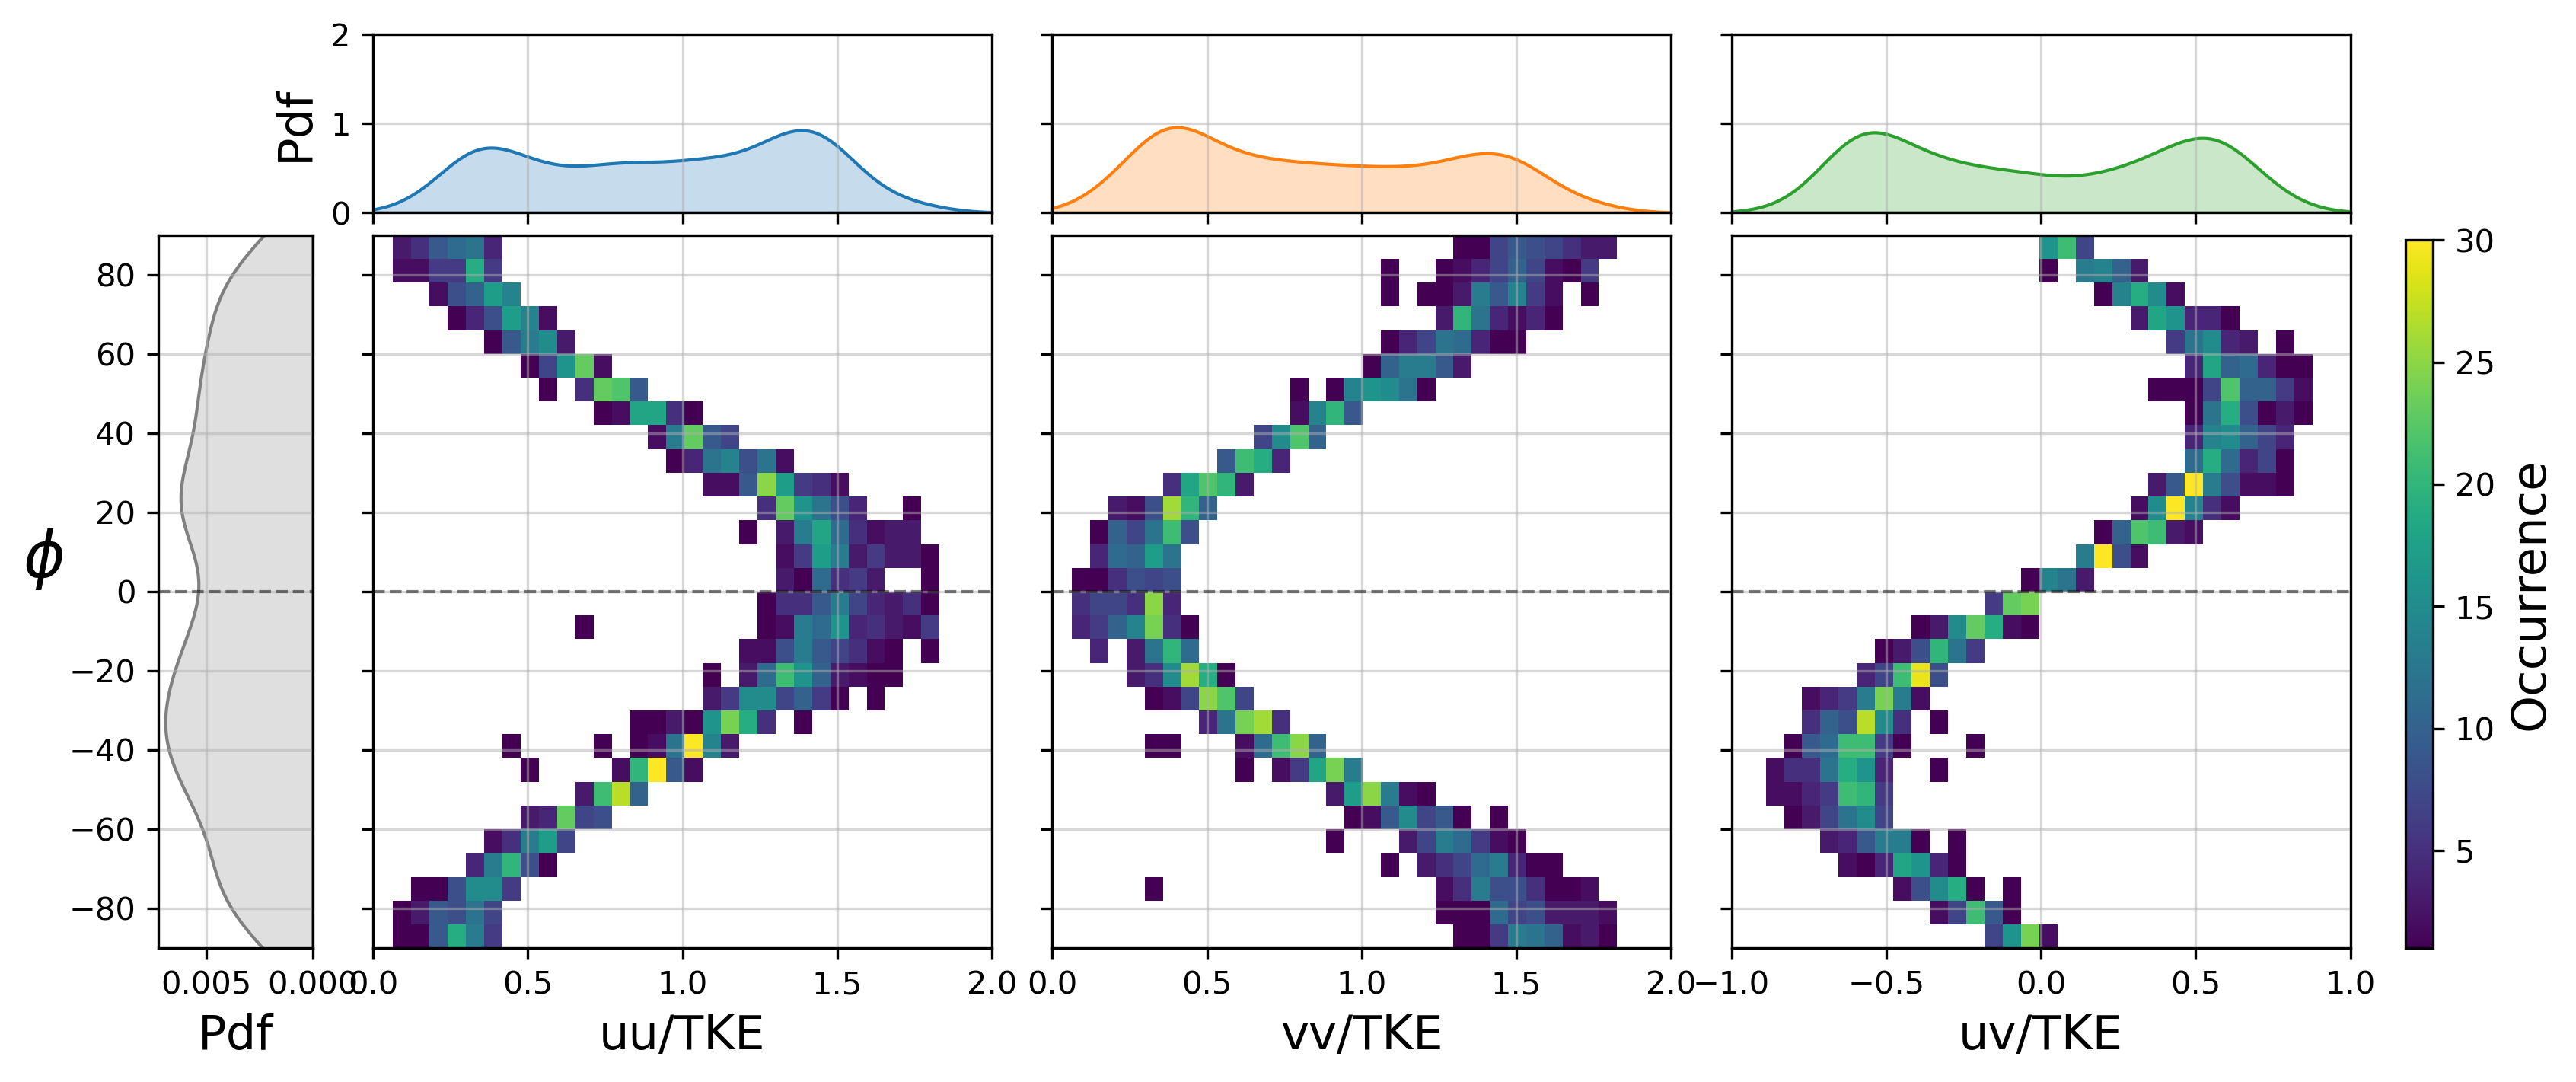

In [10]:
fig = plt.figure(figsize =(12,5))
gs = fig.add_gridspec(2, 4, height_ratios=(0.5,2),width_ratios=(0.5,2,2,2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.12, hspace=0.05)
Hmin = 1
Hmax = 30
nbin = 30
y = ds_1c.isel(eigidx = 0).phi
for col,var,xlim,c in zip([1,2,3],['uu','vv', 'uv'],[[0,2],[0,2],[-1,1]],['C0','C1','C2']):
    ax = fig.add_subplot(gs[1, col])
    ax.tick_params('y', labelleft=False)
    x = ds_1c[var]/ds_1c.tke
    
    # 2D histograms
    H, yedges, xedges = np.histogram2d(y, x, bins=nbin)
    H[H==0.0] = np.nan
    pc=ax.pcolormesh(xedges, yedges, H, cmap='viridis',vmin=Hmin,vmax=Hmax)
    ax.axhline(0, color='black',ls='--',lw=1,alpha=0.5)
    ax.set_xlabel(str(var)+'/TKE',fontsize=15)
    ax.set_xlim(xlim)
    ax.set_ylim((-90,90))
    ax.grid(alpha=0.5)
    
    ax2 = fig.add_subplot(gs[0, col],xticklabels=[])
    #ax2.tick_params('y', labelleft=False)
    ax2.set_ylim((0,2))
    ax2.set_xlim(xlim)
    ax2.grid(alpha=0.5)
    
    #density plots at margins
    p1=sns.kdeplot(x=x, ax=ax2,color=c, fill = True)
    p1.set(ylabel = None)
    p1.tick_params(labelleft=False)
    #ax2.set_ylabel('Pdf')

    
    if(col == 1):

        ax2.tick_params('y', labelleft=True)
        p1.set_ylabel('Pdf',fontsize=15)
        
# Adding the colorbar
cbar_ax = fig.add_axes([0.92, 0.1, 0.01, 0.62])
cbar = fig.colorbar(pc, cax=cbar_ax)
cbar.set_label(label='Occurrence',fontsize=15)
cbar.ax.yaxis.set_ticks_position('right')

ax_M = fig.add_subplot(gs[1, 0],sharey=ax)
ax_M.tick_params('y', labelleft=True)
ax_M.set_ylabel(r'$\phi$',labelpad=8,fontsize=20, rotation = 0)
ax_M.grid(alpha=0.5)  
ax_M.invert_xaxis()
ax_M.axhline(0, color='black',ls='--',lw=1,alpha=0.5)
ax_M.set_xlabel('Pdf',fontsize=15)  
sns.kdeplot(y=y, ax=ax_M,color='grey', fill = True)